In [1]:
%pylab inline
import numpy as np 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, fpmax, association_rules

In [5]:
df = pd.read_csv('./data/diabetes_data_upload.csv')

In [7]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<AxesSubplot:>

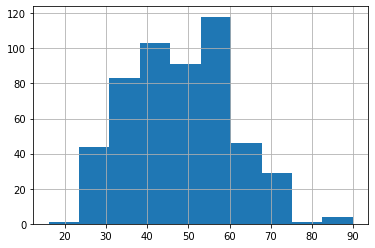

In [8]:
df['Age'].hist()

In [9]:
df['Under 40'] = df['Age'] < 40
df['40 to 60'] = (df['Age'] >= 40) & (df['Age'] <= 60)
df['Over 60'] = df['Age'] > 60
df.drop('Age', axis=1, inplace=True)

In [10]:
df['Is Female'] = df['Gender'] == 'Female'
df.drop('Gender', axis=1, inplace=True)

In [11]:
list(df.columns)

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class',
 'Under 40',
 '40 to 60',
 'Over 60',
 'Is Female']

In [12]:
df.head()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Under 40,40 to 60,Over 60,Is Female
0,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,False,True,False,False
1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,False,True,False,False
2,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,False,True,False,False
3,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,False,True,False,False
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,False,True,False,False


In [13]:
cols = [
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
]
for col in cols:
    df[col] = (df[col] == 'Yes')

In [14]:
df['Has Diabetes'] = df['class'] == 'Positive'
df.drop('class', axis=1, inplace=True)

In [15]:
df.head()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Under 40,40 to 60,Over 60,Is Female,Has Diabetes
0,False,True,False,True,False,False,False,True,False,True,False,True,True,True,False,True,False,False,True
1,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True
2,True,False,False,True,True,False,False,True,False,True,False,True,True,False,False,True,False,False,True
3,False,False,True,True,True,True,False,True,False,True,False,False,False,False,False,True,False,False,True
4,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,False,False,True


In [16]:
frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)

In [17]:
frequent_itemsets

,support,itemsets
0,0.615385,(Has Diabetes)
1,0.586538,(weakness)
2,0.569231,(40 to 60)
3,0.486538,(Itching)
4,0.459615,(delayed healing)
...,...,...
214,0.217308,"(Polyuria, Polydipsia, Is Female, Has Diabetes)"
215,0.200000,"(visual blurring, Is Female, Has Diabetes)"
216,0.234615,"(partial paresis, Is Female, Has Diabetes)"
217,0.200000,"(partial paresis, Polydipsia, Is Female)"


In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Polyuria, Itching)",(Has Diabetes),0.263462,0.615385,0.234615,0.890511,1.447080,0.072485,3.512821
1,"(Itching, Has Diabetes)",(Polyuria),0.296154,0.496154,0.234615,0.792208,1.596698,0.087678,2.424760
2,(Polyuria),"(Itching, Has Diabetes)",0.496154,0.296154,0.234615,0.472868,1.596698,0.087678,1.335238
3,(Has Diabetes),"(Polyuria, Itching)",0.615385,0.263462,0.234615,0.381250,1.447080,0.072485,1.190365
4,(Itching),(delayed healing),0.486538,0.459615,0.336538,0.691700,1.504953,0.112918,1.752786
...,...,...,...,...,...,...,...,...,...
897,"(Is Female, Has Diabetes)","(partial paresis, Polydipsia)",0.332692,0.301923,0.200000,0.601156,1.991090,0.099553,1.750251
898,(partial paresis),"(Polydipsia, Is Female, Has Diabetes)",0.430769,0.240385,0.200000,0.464286,1.931429,0.096450,1.417949
899,(Polydipsia),"(partial paresis, Is Female, Has Diabetes)",0.448077,0.234615,0.200000,0.446352,1.902484,0.094874,1.382439
900,(Is Female),"(partial paresis, Polydipsia, Has Diabetes)",0.369231,0.294231,0.200000,0.541667,1.840959,0.091361,1.539860


In [20]:
valid_rows = rules['consequents'].apply(lambda x: 'Has Diabetes' in x)

In [21]:
valid_rows

0       True
1      False
2       True
3      False
4      False
       ...  
897    False
898     True
899     True
900     True
901    False
Name: consequents, Length: 902, dtype: bool

In [22]:
valid = rules[valid_rows]

In [23]:
valid.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Polyuria, Itching)",(Has Diabetes),0.263462,0.615385,0.234615,0.890511,1.447080,0.072485,3.512821
2,(Polyuria),"(Itching, Has Diabetes)",0.496154,0.296154,0.234615,0.472868,1.596698,0.087678,1.335238
14,"(Polyuria, delayed healing)",(Has Diabetes),0.265385,0.615385,0.236538,0.891304,1.448370,0.073225,3.538462
16,(Polyuria),"(delayed healing, Has Diabetes)",0.496154,0.294231,0.236538,0.476744,1.620307,0.090555,1.348803
18,(Polydipsia),(Has Diabetes),0.448077,0.615385,0.432692,0.965665,1.569206,0.156953,11.201923


In [24]:
valid = valid.sort_values('lift', ascending=False)

In [25]:
valid

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
479,"(Polydipsia, Polyphagia)","(partial paresis, Polyuria, Has Diabetes)",0.282692,0.309615,0.207692,0.734694,2.372924,0.120166,2.602219
157,"(Polydipsia, weakness)","(visual blurring, Polyuria, Has Diabetes)",0.344231,0.259615,0.205769,0.597765,2.302504,0.116402,1.840678
480,"(partial paresis, Polydipsia)","(Polyuria, Has Diabetes, Polyphagia)",0.301923,0.300000,0.207692,0.687898,2.292994,0.117115,2.242857
486,"(partial paresis, Polyuria)","(Polydipsia, Polyphagia, Has Diabetes)",0.323077,0.280769,0.207692,0.642857,2.289628,0.116982,2.013846
895,"(Polydipsia, Is Female)","(partial paresis, Has Diabetes)",0.240385,0.369231,0.200000,0.832000,2.253333,0.111243,3.754579
...,...,...,...,...,...,...,...,...,...
242,"(visual blurring, weakness)","(Polyuria, Has Diabetes)",0.336538,0.467308,0.223077,0.662857,1.418460,0.065810,1.580020
286,"(partial paresis, visual blurring)",(Has Diabetes),0.282692,0.615385,0.246154,0.870748,1.414966,0.072189,2.975709
533,(Polyphagia),"(Polyuria, Has Diabetes)",0.455769,0.467308,0.300000,0.658228,1.408553,0.087016,1.558618
562,(sudden weight loss),(Has Diabetes),0.417308,0.615385,0.361538,0.866359,1.407834,0.104734,2.877984
